#### WLPR: liquid production rate
#### WOPR:  oil production rate
#### WWPR:  water production rate
####  WWIR: water injection rate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Caminho do CSV
csv_path = "C:/Users/calva/OneDrive/Documentos/Doutorado_PUC/benchmark/OPM_Egg/simulacao_0/EGG_MODEL_ECL_production.csv"

# Carrega os dados
df = pd.read_csv(csv_path, parse_dates=["DATE"])
df.set_index("DATE", inplace=True)

# Identifica os 4 poços produtores (ignorando INJECT)
wells = sorted(set(col.split(":")[1] for col in df.columns if ':' in col and "INJECT" not in col))[:4]

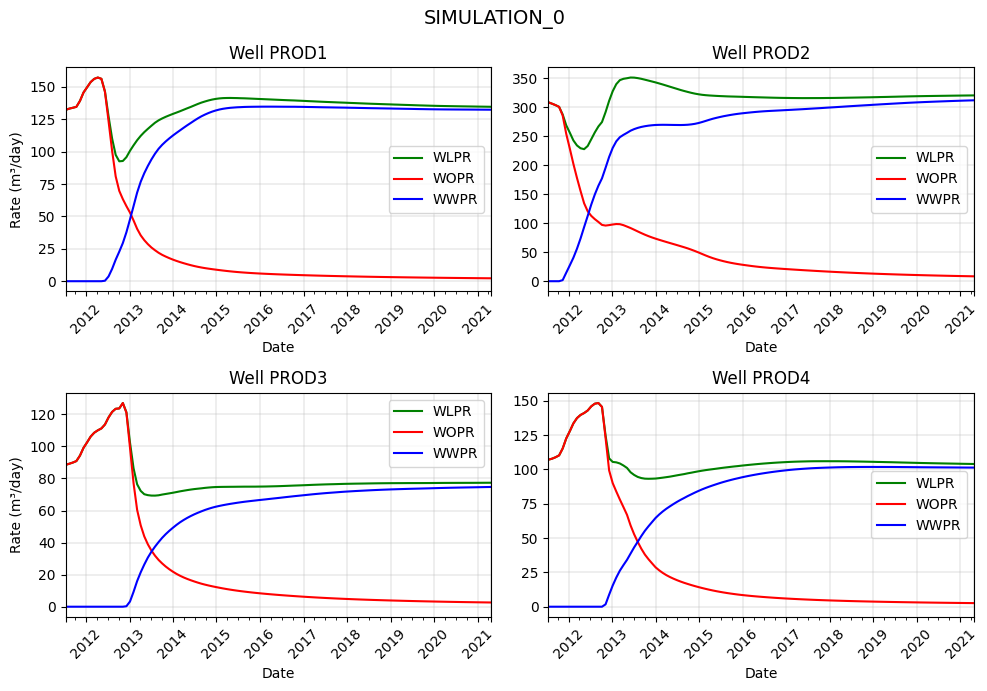

In [3]:
# Configura o layout: 2 linhas x 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Cores por variável
colors = {
    "WLPR": "green",
    "WOPR": "red",
    "WWPR": "blue"
}

# Plota cada poço
for idx, well in enumerate(wells):
    row, col = divmod(idx, 2)
    ax = axes[row][col]
    
    for var in ["WLPR", "WOPR", "WWPR"]:
        colname = f"{var}:{well}"
        if colname in df.columns:
            df[colname].plot(ax=ax, label=var, color=colors[var])
    
    ax.set_title(f"Well {well}")
    ax.set_xlabel("Date")
    ax.grid(lw=0.3)
    ax.tick_params(axis='x', rotation=45)  # Inclina as datas
    if col == 0:
        ax.set_ylabel("Rate (m³/day)")
    ax.legend()
    
plt.suptitle("SIMULATION_0", fontsize=14)
plt.tight_layout()
plt.show()

In [4]:
df

,WLPR:PROD1,WLPR:PROD2,WLPR:PROD3,WLPR:PROD4,WOPR:PROD1,WOPR:PROD2,WOPR:PROD3,WOPR:PROD4,WWPR:PROD1,WWPR:PROD2,WWPR:PROD3,WWPR:PROD4,WWIR:INJECT1
DATE,,,,,,,,,,,,,
2011-07-15,132.222031,308.240814,88.456642,107.096260,132.222031,308.240814,88.456642,107.096260,-0.000000,-0.000000,-0.000000,-0.000000,79.5
2011-08-14,133.182831,305.885101,89.159378,107.803009,133.182831,305.885101,89.159378,107.803009,-0.000000,-0.000000,-0.000000,-0.000000,79.5
2011-09-13,133.846848,303.373474,89.894142,108.864296,133.846848,303.373474,89.894142,108.864296,-0.000000,-0.000000,-0.000000,-0.000000,79.5
2011-10-13,134.568680,300.345581,90.828758,110.224380,134.568680,300.345581,90.828758,110.224380,-0.000000,-0.000000,-0.000000,-0.000000,79.5
2011-11-12,139.124863,287.340179,94.216797,115.256020,139.124863,285.460083,94.216797,115.256020,-0.000000,1.880093,-0.000000,-0.000000,79.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,134.775375,319.807465,77.265846,104.150459,2.357327,8.914371,2.762662,2.738828,132.418045,310.893097,74.503181,101.411636,79.5
2021-01-23,134.733017,319.889618,77.279976,104.101501,2.331804,8.792935,2.730384,2.709477,132.401215,311.096680,74.549591,101.392029,79.5
2021-02-22,134.691940,319.965424,77.293236,104.055527,2.306757,8.674280,2.698878,2.680938,132.385193,311.291138,74.594360,101.374588,79.5


In [97]:
p1_0 = (df['WOPR:PROD1'].head(6) * df['WOPR:PROD1'].head(6).index.daysinmonth).sum() * 6.28981
p2_0 = (df['WOPR:PROD2'].head(6) * df['WOPR:PROD2'].head(6).index.daysinmonth).sum() * 6.28981
p3_0 = (df['WOPR:PROD3'].head(6) * df['WOPR:PROD3'].head(6).index.daysinmonth).sum() * 6.28981
p4_0 = (df['WOPR:PROD4'].head(6) * df['WOPR:PROD4'].head(6).index.daysinmonth).sum() * 6.28981
p1_0 + p2_0 + p3_0 + p4_0

np.float64(732798.0640286563)

In [98]:
7.327981e+05

732798.1

##########################################################################################################################################

#####################################################################################################################################################

In [29]:
import pandas as pd
import os
import calendar

# Conversion factor from cubic meters to barrels
M3_TO_BBL = 6.28981

# Base path for simulations
base_path = "C:/Users/calva/OneDrive/Documentos/Doutorado_PUC/benchmark/OPM_Egg"

# List of simulation folder names
num_simulations = 101
sim_names = [f"simulacao_{i}" for i in range(num_simulations)]

# Wells of interest
wells = ["PROD1", "PROD2", "PROD3", "PROD4", "INJECT1"]

# Initialize a DataFrame to store production per simulation and well
matrix = pd.DataFrame(index=sim_names, columns=wells)

# Iterate through all simulation folders
for sim in sim_names:
    csv_path = os.path.join(base_path, sim, "EGG_MODEL_ECL_production.csv")
    
    if not os.path.isfile(csv_path):
        print(f"❌ CSV not found: {csv_path}")
        continue
    
    try:
        # Load CSV and set the DATE column as index
        df = pd.read_csv(csv_path, parse_dates=["DATE"])
        df.set_index("DATE", inplace=True)

        # Add a column with the number of days in each month
        df["days_in_month"] = df.index.daysinmonth

        # Multiply each rate by days in the month to get monthly volume in m³,
        # then convert from m³ to BBL
        rate_cols = [col for col in df.columns if ":" in col]
        for col in rate_cols:
            df[col] = df[col] * df["days_in_month"]  # Monthly volume in m³
            df[col] = df[col] * M3_TO_BBL            # Monthly volume in BBL

        # Aggregate monthly volumes into annual totals
        df_yearly = df[rate_cols].resample("YE").sum()
        df_yearly.index = df_yearly.index.year  # Keep only the year for clarity

        # Store annual production per well
        for well in wells:
            if "INJECT" in well:
                # For injector wells: use WWIR only
                col_name = f"WWIR:{well}"
                if col_name in df_yearly.columns:
                    matrix.at[sim, well] = df_yearly[[col_name]]
            else:
                # For producer wells: use WLPR, WOPR, WWPR
                cols = [f"{var}:{well}" for var in ["WLPR", "WOPR", "WWPR"] if f"{var}:{well}" in df_yearly.columns]
                if cols:
                    matrix.at[sim, well] = df_yearly[cols]

    except Exception as e:
        print(f"⚠️ Error reading {csv_path}: {e}")


In [30]:
matrix

,PROD1,PROD2,PROD3,PROD4,INJECT1
simulacao_0,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_1,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_2,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_3,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_4,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
...,...,...,...,...,...
simulacao_96,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_97,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_98,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...
simulacao_99,WLPR:PROD1 WOPR:PROD1 WWPR:PR...,WLPR:PROD2 WOPR:PROD2 WWPR:PR...,WLPR:PROD3 WOPR:PROD3 WWPR:PR...,WLPR:PROD4 WOPR:PROD4 WWPR:PR...,WWIR:INJECT1 DATE 2011 ...


In [35]:
import pandas as pd

# Define producer wells
producer_wells = ["PROD1", "PROD2", "PROD3", "PROD4"]

# Define years of interest
years = list(range(2011, 2022))  # From 2011 to 2021

# Create an empty DataFrame with years as index and simulations as columns
sim_names = [f"simulacao_{i}" for i in range(101)]
field_matrix = pd.DataFrame(index=years, columns=sim_names)

# Loop through simulations
for sim in sim_names:
    total_curve = pd.Series(0.0, index=years)  # Initialize with zeros
    
    for well in producer_wells:
        well_df = matrix.at[sim, well]

        # Ensure data is valid and contains WOPR
        if isinstance(well_df, pd.DataFrame) and f"WOPR:{well}" in well_df.columns:
            wopr_series = well_df[f"WOPR:{well}"]
            for year in years:
                if year in wopr_series.index:
                    total_curve[year] += wopr_series[year]

    # Store the full production curve in the matrix
    field_matrix[sim] = total_curve

# Optional: convert values to float for safety
field_matrix = field_matrix.astype(float)

# Preview
field_matrix
# Optional: export
# field_matrix.to_csv("field_production_matrix.csv")


,simulacao_0,simulacao_1,simulacao_2,simulacao_3,simulacao_4,simulacao_5,simulacao_6,simulacao_7,simulacao_8,simulacao_9,...,simulacao_91,simulacao_92,simulacao_93,simulacao_94,simulacao_95,simulacao_96,simulacao_97,simulacao_98,simulacao_99,simulacao_100
2011,7.327981e+05,7.361016e+05,7.359847e+05,7.360492e+05,7.360408e+05,7.360480e+05,7.360309e+05,7.360443e+05,7.360696e+05,7.360415e+05,...,7.360313e+05,7.360374e+05,7.360465e+05,7.349876e+05,7.360466e+05,7.360362e+05,7.360793e+05,7.349423e+05,7.360429e+05,7.360656e+05
2012,1.162666e+06,1.315074e+06,1.251593e+06,1.291419e+06,1.334358e+06,1.220754e+06,1.196820e+06,1.338735e+06,1.276573e+06,1.237165e+06,...,1.233355e+06,1.291170e+06,1.318343e+06,1.284518e+06,1.279449e+06,1.288253e+06,1.274652e+06,1.159202e+06,1.293443e+06,1.318546e+06
2013,5.373882e+05,5.427198e+05,5.818692e+05,5.684954e+05,5.992801e+05,5.263066e+05,5.100006e+05,4.996452e+05,5.216712e+05,4.768551e+05,...,4.818159e+05,5.285147e+05,5.683295e+05,5.885429e+05,5.214934e+05,5.598775e+05,5.238475e+05,4.768659e+05,5.955390e+05,5.321118e+05
2014,2.498867e+05,2.085344e+05,2.498229e+05,1.970164e+05,2.034294e+05,2.478960e+05,2.287453e+05,1.999992e+05,1.831895e+05,2.068004e+05,...,2.365340e+05,2.148166e+05,2.021361e+05,1.934705e+05,2.110093e+05,2.187590e+05,2.290730e+05,2.401601e+05,2.092300e+05,2.140415e+05
2015,1.470402e+05,1.236194e+05,1.322246e+05,1.220305e+05,1.114635e+05,1.521834e+05,1.543200e+05,1.344261e+05,1.248775e+05,1.389116e+05,...,1.463829e+05,1.245660e+05,1.181837e+05,1.168799e+05,1.262470e+05,1.238890e+05,1.406404e+05,1.628247e+05,1.175461e+05,1.252067e+05
2016,1.001958e+05,8.728924e+04,8.231451e+04,8.828652e+04,8.023720e+04,9.893371e+04,1.129538e+05,9.817536e+04,9.599835e+04,1.025618e+05,...,9.940071e+04,8.906136e+04,8.528968e+04,8.486046e+04,8.864791e+04,8.755811e+04,9.444373e+04,1.195642e+05,8.366060e+04,8.740490e+04
2017,7.699104e+04,6.742672e+04,6.201379e+04,6.809784e+04,6.202369e+04,7.119507e+04,8.277710e+04,7.324160e+04,7.632463e+04,7.968928e+04,...,7.529167e+04,6.877222e+04,6.595267e+04,6.588216e+04,6.715574e+04,6.723205e+04,6.906014e+04,8.814622e+04,6.401791e+04,6.658515e+04
2018,6.127106e+04,5.488722e+04,5.048660e+04,5.506433e+04,5.028399e+04,5.656651e+04,6.256549e+04,5.733984e+04,6.261181e+04,6.454196e+04,...,6.053228e+04,5.586673e+04,5.317124e+04,5.336125e+04,5.437006e+04,5.429453e+04,5.502145e+04,6.733643e+04,5.170435e+04,5.382495e+04
2019,5.394112e+04,4.967644e+04,4.590057e+04,4.978204e+04,4.545662e+04,5.084875e+04,5.405556e+04,5.044245e+04,5.649690e+04,5.789552e+04,...,5.398413e+04,5.027724e+04,4.745737e+04,4.821530e+04,4.935651e+04,4.894790e+04,4.952733e+04,5.813333e+04,4.680944e+04,4.854017e+04
2020,4.156486e+04,3.913352e+04,3.647049e+04,3.931407e+04,3.585159e+04,4.007576e+04,4.149676e+04,3.920147e+04,4.418525e+04,4.509169e+04,...,4.241100e+04,3.940058e+04,3.708831e+04,3.812519e+04,3.915176e+04,3.869835e+04,3.878019e+04,4.438412e+04,3.708147e+04,3.821502e+04


In [51]:
import matplotlib.pyplot as plt

def plot_field_production(field_matrix, simulations="all"):
    """
    Plot field production curves (WOPR total) for selected simulations.

    Parameters:
        field_matrix (pd.DataFrame): DataFrame with years as index and simulation names as columns.
        simulations (str or list): 
            - "all" to plot all simulations,
            - list of integers, e.g., [0, 5, 20],
            - string interval, e.g., "0-10".
    """
    # Determine simulations to plot
    if simulations == "all":
        selected_sims = field_matrix.columns.tolist()
    elif isinstance(simulations, str) and "-" in simulations:
        start, end = map(int, simulations.split("-"))
        selected_sims = [f"simulacao_{i}" for i in range(start, end + 1)]
    elif isinstance(simulations, list):
        selected_sims = [f"simulacao_{i}" for i in simulations]
    else:
        raise ValueError("Invalid input. Use 'all', a range like '0-10', or a list like [0, 1, 5].")

    # Plot
    plt.figure(figsize=(10, 4))
    for sim in selected_sims:
        if sim in field_matrix.columns:
            plt.plot(field_matrix.index, field_matrix[sim], label=sim, linewidth=1)
        else:
            print(f"⚠️ Simulation not found: {sim}")

    plt.xlabel("Year")
    plt.ylabel("Field Oil Production (BBL)")
    plt.title("Field Production Curves - Selected Simulations")
    plt.grid(True, lw=0.2)
    plt.xticks(ticks=years)
    #plt.legend(loc="upper right", fontsize="small", ncol=2)
    plt.tight_layout()
    plt.show()

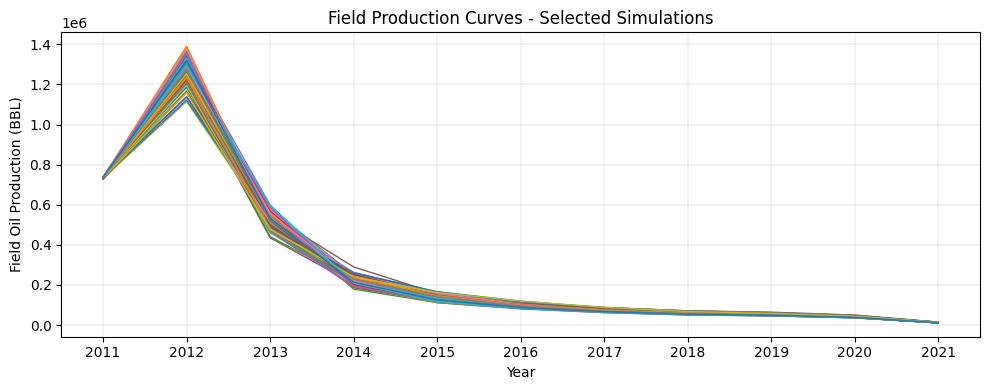

In [52]:
plot_field_production(field_matrix, simulations = "all")

In [62]:
field_matrix.describe().T

,count,mean,std,min,25%,50%,75%,max
simulacao_0,11.0,288729.005121,370018.418405,12275.682339,57606.093116,100195.828514,393637.447566,1.162666e+06
simulacao_1,11.0,294195.088365,411319.040051,11683.823191,52281.828684,87289.238100,375627.124267,1.315074e+06
simulacao_2,11.0,294512.912390,398652.212814,10961.737174,48193.584944,82314.514307,415846.034928,1.251593e+06
simulacao_3,11.0,293392.185660,407330.615920,11758.941105,52423.182363,88286.519136,382755.903818,1.291419e+06
simulacao_4,11.0,297194.836725,421890.786034,10718.555793,47870.307196,80237.195381,401354.747730,1.334358e+06
...,...,...,...,...,...,...,...,...
simulacao_96,11.0,294103.375258,405673.375904,11591.697814,51621.216664,87558.105262,389318.245521,1.288253e+06
simulacao_97,11.0,292971.009403,398732.301617,11556.459495,52274.390868,94443.730498,376460.213943,1.274652e+06
simulacao_98,11.0,287690.540863,362928.990551,13036.318746,62734.877937,119564.215524,358513.005584,1.159202e+06
simulacao_99,11.0,295107.343198,410670.525404,11106.309920,49256.896024,83660.597564,402384.459834,1.293443e+06


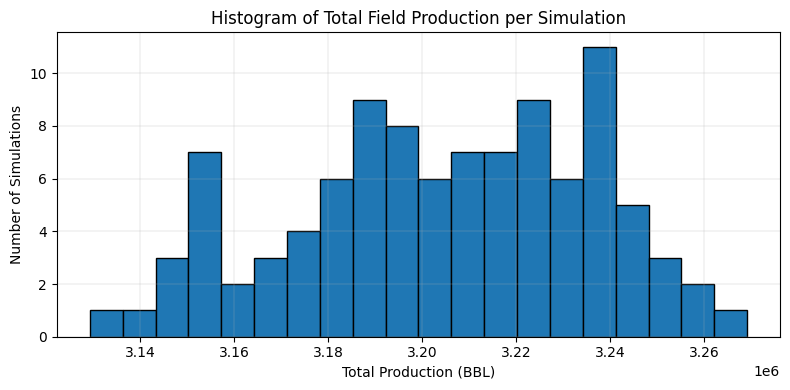

In [110]:
# Soma da produção de cada simulação ao longo dos anos
total_por_simulacao = field_matrix.sum(axis=0)

# Plotar histograma dessas somas
plt.figure(figsize=(8, 4))
plt.hist(total_por_simulacao, bins=20, edgecolor='black')
plt.title("Histogram of Total Field Production per Simulation")
plt.xlabel("Total Production (BBL)")
plt.ylabel("Number of Simulations")
plt.grid(True, lw=0.2)
plt.tight_layout()
plt.show()


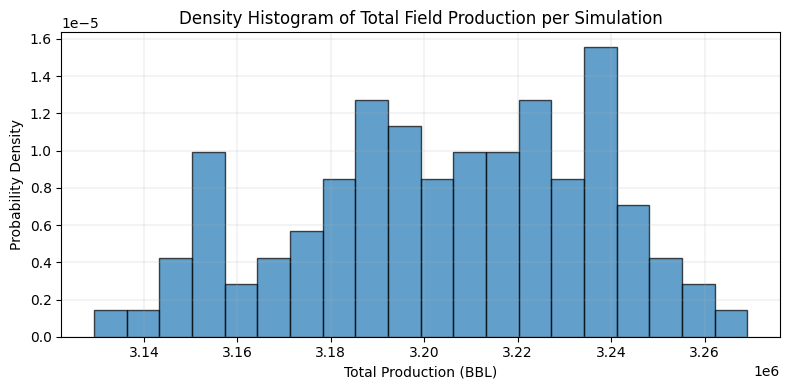

In [118]:
import matplotlib.pyplot as plt

# Suponha que você tenha a soma da produção por simulação
total_por_simulacao = field_matrix.sum(axis=0)

# Histograma com densidade
plt.figure(figsize=(8, 4))
plt.hist(total_por_simulacao, bins=20, density=True, edgecolor='black', alpha=0.7)
plt.title("Density Histogram of Total Field Production per Simulation")
plt.xlabel("Total Production (BBL)")
plt.ylabel("Probability Density")
plt.grid(True, lw=0.2)
plt.tight_layout()
plt.show()

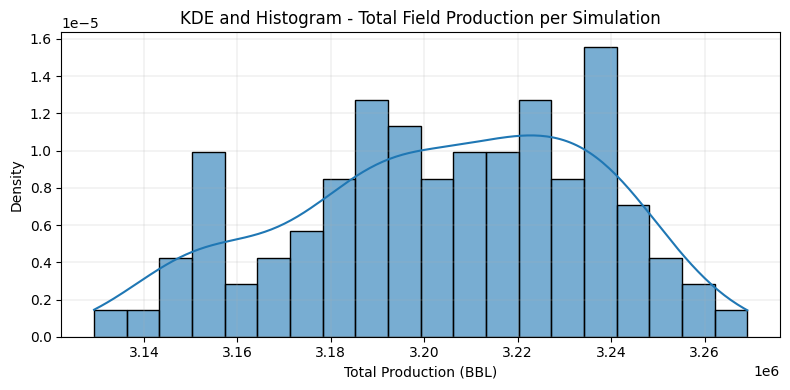

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Soma da produção por simulação (por exemplo, do DataFrame field_matrix)
total_por_simulacao = field_matrix.sum(axis=0)

# KDE + histograma com seaborn
plt.figure(figsize=(8, 4))
sns.histplot(total_por_simulacao, bins=20, kde=True, stat="density", alpha=0.6)

plt.title("KDE and Histogram - Total Field Production per Simulation")
plt.xlabel("Total Production (BBL)")
plt.ylabel("Density")
plt.grid(True, lw=0.2)
plt.tight_layout()
plt.show()


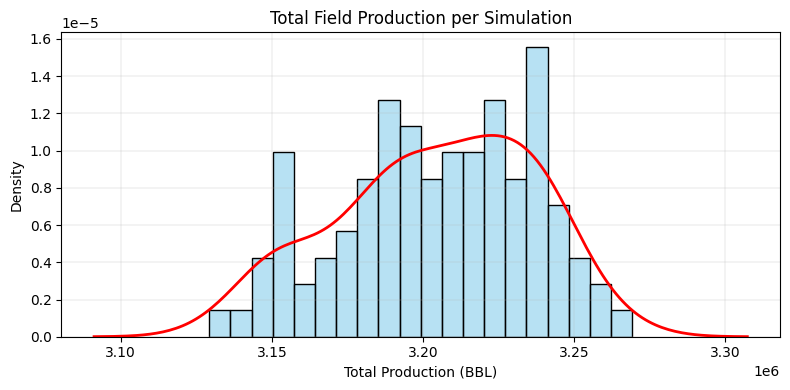

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Soma da produção por simulação
total_por_simulacao = field_matrix.sum(axis=0)

plt.figure(figsize=(8, 4))

# Histograma (sem KDE embutido)
sns.histplot(
    total_por_simulacao,
    bins=20,
    stat="density",
    edgecolor="black",
    alpha=0.6,
    color="skyblue"
)

# KDE plot separado, com cor personalizada
sns.kdeplot(
    total_por_simulacao,
    color="red",
    linewidth=2,
    label="KDE"
)

plt.title("Total Field Production per Simulation")
plt.xlabel("Total Production (BBL)")
plt.ylabel("Density")
plt.grid(True, lw=0.2)
#plt.legend()
plt.tight_layout()
plt.show()



In [63]:
# Calcula as curvas estatísticas por ano
p10_curve = field_matrix.quantile(0.10, axis=1)
p50_curve = field_matrix.quantile(0.50, axis=1)
p90_curve = field_matrix.quantile(0.90, axis=1)
mean_curve = field_matrix.mean(axis=1)

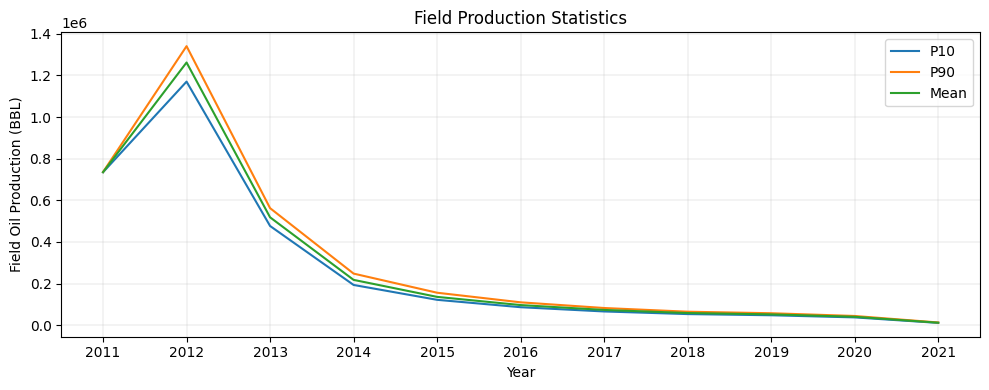

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Curvas estatísticas
plt.plot(p10_curve.index, p10_curve, label="P10", linestyle="-")
#plt.plot(p50_curve.index, p50_curve, label="P50 (Median)", linestyle="-")
plt.plot(p90_curve.index, p90_curve, label="P90", linestyle="-")
plt.plot(mean_curve.index, mean_curve, label="Mean", linestyle="-")

# Eixo e layout
plt.xlabel("Year")
plt.ylabel("Field Oil Production (BBL)")
plt.title("Field Production Statistics")
plt.xticks(ticks=range(2011, 2022))
plt.grid(True, linewidth=0.2)
plt.legend()
plt.tight_layout()
plt.show()
